In [1]:
!pip install lazypredict

In [2]:
import pandas as pd
import numpy as np

# **SyriaTel Dataset**

In [3]:
df = pd.read_csv('/content/telecom_churn_data.txt')

In [4]:
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [5]:
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl minutes            0.009514  -0.018288               0.002856   
total intl calls              0.020661  -0.024179               0.013957   
total intl charge             0.009546  -0.018395               0.002884   
customer service calls       -0.003796   0.027572              -0.013263   
churn                         0.016541   0.006174              -0.089728   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
area code                       -0.008264        -0.009646         -0.008264   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   
churn                            0.205151         0.018459          0.205151   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
area code                        0.003580        -0.011886          0.003607   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes              -0.011035         0.008703         -0.011043   
total intl calls                 0.002541         0.017434          0.002541   
total intl cha

<ipython-input-7-27a7f6056490>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


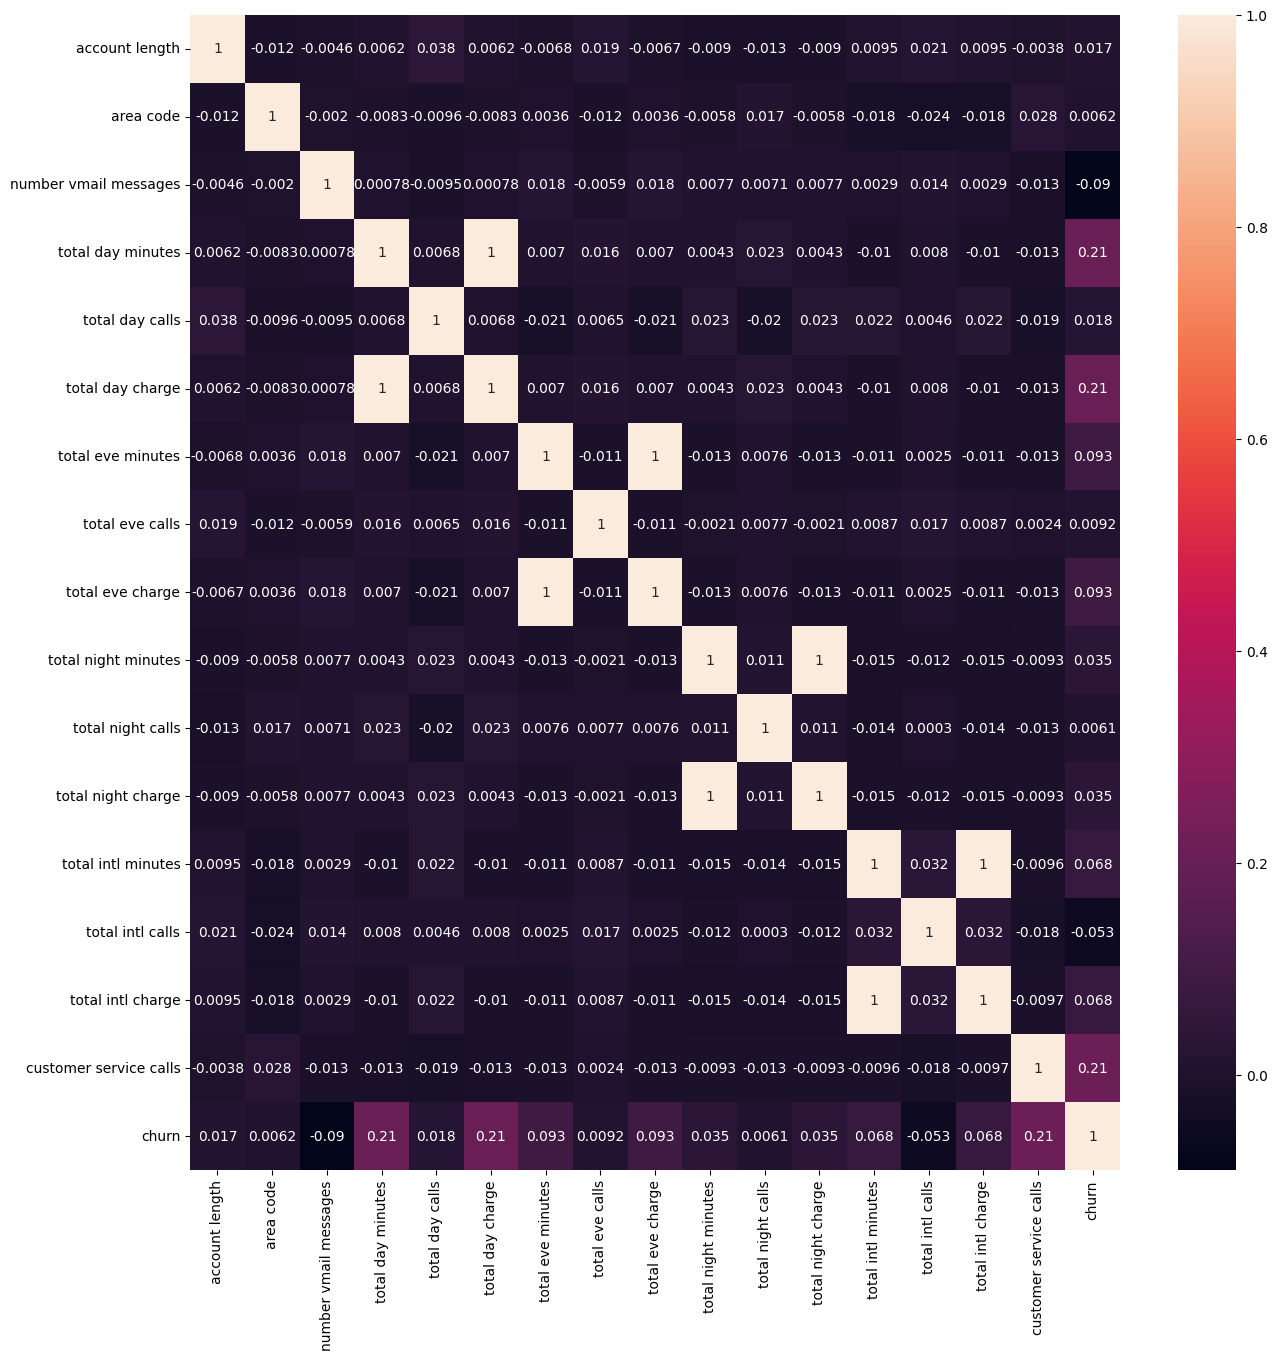

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame 'df' creation and correlation computation is assumed to be done before this step.

# Set the figure size using matplotlib
plt.figure(figsize=(15, 15))  # You can adjust the dimensions as needed

# Now plot the heatmap
sns.heatmap(df.corr(), annot=True)

# Display the plot
plt.show()

* Total day minutes and total day charge are most correlated features to churn
* Customer service calls are also correlated to churn

In [8]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Drop columns that are not relevant or are unique identifiers
df = df.drop(['state','area code', 'phone number'], axis=1)

# Encode binary categorical columns
binary_cols = ['international plan', 'voice mail plan', 'churn']
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Splitting the dataset into training and testing sets
X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2666, 17), (667, 17), (2666,), (667,))

In [11]:
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier to compare various models
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the performance of the models
models


 97%|█████████▋| 28/29 [00:10<00:00,  3.11it/s]

[LightGBM] [Info] Number of positive: 382, number of negative: 2284
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2392
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143286 -> initscore=-1.788263
[LightGBM] [Info] Start training from score -1.788263


100%|██████████| 29/29 [00:11<00:00,  2.60it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.95               0.87     0.87      0.95   
LGBMClassifier                     0.95               0.86     0.86      0.95   
RandomForestClassifier             0.95               0.85     0.85      0.94   
DecisionTreeClassifier             0.92               0.85     0.85      0.92   
BaggingClassifier                  0.94               0.84     0.84      0.94   
ExtraTreesClassifier               0.94               0.81     0.81      0.94   
SVC                                0.93               0.78     0.78      0.92   
NearestCentroid                    0.76               0.77     0.77      0.79   
LabelPropagation                   0.88               0.72     0.72      0.87   
LabelSpreading                     0.88               0.72     0.72      0.87   
ExtraTreeClassifier                0.85               0.71     0.71      0.85   
GaussianNB                         0.85               0.70     0.70      0.85   
QuadraticDiscriminantAnalysis      0.86               0.69     0.69      0.85   
KNeighborsClassifier               0.90               0.68     0.68      0.88   
AdaBoostClassifier                 0.88               0.67     0.67      0.86   
PassiveAggressiveClassifier        0.75               0.65     0.65      0.78   
LinearDiscriminantAnalysis         0.85               0.60     0.60      0.83   
Perceptron                         0.83               0.60     0.60      0.82   
LogisticRegression                 0.86               0.58     0.58      0.82   
CalibratedClassifierCV             0.86               0.58     0.58      0.82   
BernoulliNB                        0.85               0.55     0.55      0.81   
LinearSVC                          0.85               0.55     0.55      0.81   
RidgeClassifier                    0.85               0.54     0.54      0.81   
RidgeClassifierCV                  0.85               0.54     0.54      0.81   
SGDClassifier                      0.84               0.52     0.52      0.79   
DummyClassifier                    0.85               0.50     0.50      0.78   

                               Time Taken  
Model                                      
XGBClassifier                        0.65  
LGBMClassifier                       0.37  
RandomForestClassifier               1.44  
DecisionTreeClassifier               0.22  
BaggingClassifier                    0.27  
ExtraTreesClassifier                 1.21  
SVC                                  0.47  
NearestCentroid                      0.06  
LabelPropagation                     1.25  
LabelSpreading                       1.58  
ExtraTreeClassifier                  0.06  
GaussianNB                           0.04  
QuadraticDiscriminantAnalysis        0.06  
KNeighborsClassifier                 0.35  
AdaBoostClassifier                   0.31  
PassiveAggressiveClassifier          0.05  
LinearDiscriminantAnalysis           0.11  
Perceptron                           0.07  
LogisticRegression                   0.11  
CalibratedClassifierCV               1.36  
BernoulliNB                          0.03  
LinearSVC                            0.57  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.05  
SGDClassifier                        0.13  
DummyClassifier                      0.06

In [12]:
!pip install xgboost lightgbm

In [13]:
import numpy as np
import pandas as pd
import joblib
import os
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load a dataset
# digits = load_digits()
# X, y = digits.data, digits.target

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# df = pd.read_csv('/content/telecom_churn_data.txt')

# # Assuming the last column is the target variable
# X = df.iloc[:, :-1]  # All columns except the last one as features
# y = df.iloc[:, -1]   # The last column as the target variable


# df = df.drop(['state', 'area code', 'phone number'], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "xgboost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LGBM": LGBMClassifier(),
    "random_forest": RandomForestClassifier(),
    "decision_tree": DecisionTreeClassifier(),
    "bagging": BaggingClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    os.makedirs('./telecom_syriatel_models', exist_ok=True)
    model_path = os.path.join('./telecom_syriatel_models', f'{name}.pkl')
    joblib.dump(clf, model_path)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} accuracy: {accuracy:.4f}")

# Displaying overall results
pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])


xgboost accuracy: 0.9535
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 382, number of negative: 2284
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2384
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.143286 -> initscore=-1.788263
[LightGBM] [Info] Start training from score -1.788263
LGBM accuracy: 0.9520
random_forest accuracy: 0.9505
decision_tree accuracy: 0.9160
bagging accuracy: 0.9445


Accuracy
xgboost            0.95
LGBM               0.95
random_forest      0.95
decision_tree      0.92
bagging            0.94

**LIME**

In [14]:
!pip install lime


In [15]:
# import lime
# import lime.lime_tabular
# from sklearn.datasets import load_iris
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split

# # Example dataset
# iris = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# # Train a model
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Initialize LIME explainer
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     training_data=X_train,
#     feature_names=X.columns[:-1],
#     class_names=[0,1],
#     mode='classification'
# )

# # Explain a prediction
# idx = 1  # Index of the sample in X_test to explain
# explanation = explainer.explain_instance(X_test[idx], model.predict_proba, num_features=4)
# explanation.show_in_notebook(show_table=True, show_all=False)

import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined and preprocessed from your custom dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a RandomForestClassifier model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Initializing LIME Explainer
# Make sure feature_names is correctly defined. If X is a DataFrame, you can use X.columns.
# If X is a numpy array, you should manually define the feature names as a list.
feature_names = X.columns if hasattr(X, 'columns') else ['feature_' + str(i) for i in range(X.shape[1])]

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  # Make sure training data is a numpy array
    feature_names=feature_names,
    class_names=np.unique(y),  # Assuming y contains the target class labels
    mode='classification'
)

# Explain a prediction for a specific instance
# Ensure idx points to a valid index in X_test
idx = 1  # Example index, adjust based on your dataset and indexing

# Check if X_test is a DataFrame and use .iloc[idx] to access the instance
# If it's a numpy array, access it with [idx]
instance = X_test.iloc[[idx]].values if hasattr(X_test, 'iloc') else X_test[idx]

# Ensure instance is formatted correctly for the model
# For pandas DataFrame, we used .values to get a numpy representation
# If it's a single instance, reshape might be necessary depending on the model input requirements
instance = instance.reshape(1, -1)

# It's crucial to pass a function that the explainer can use to make predictions
# This function should return probabilities
predict_fn = lambda x: model.predict_proba(x).astype(float)

# Generate explanation
explanation = explainer.explain_instance(instance[0], predict_fn, num_features=len(feature_names))


# Extracting the feature names and their weights
feature_importances = explanation.as_list()

# This will give you a list of tuples where the first element is the feature and
# the second element is the weight of that feature.
for feature, weight in feature_importances:
    print(f"Feature: {feature}, Weight: {weight}")


# Sorting features by their absolute importance
sorted_features = sorted(feature_importances, key=lambda x: abs(x[1]), reverse=True)

# Displaying sorted features
for feature, weight in sorted_features:
    print(f"Feature: {feature}, Weight: {weight}")


Feature: international plan <= 0.00, Weight: -0.4337009777869491
Feature: voice mail plan <= 0.00, Weight: 0.08540023800174608
Feature: customer service calls <= 1.00, Weight: -0.05865245739881317
Feature: total intl minutes > 12.00, Weight: 0.04170986999531667
Feature: total day minutes <= 143.90, Weight: -0.0322710258612632
Feature: 4.00 < total intl calls <= 6.00, Weight: -0.026595714851149185
Feature: total day calls > 114.00, Weight: 0.014861416306240811
Feature: 7.50 < total night charge <= 9.05, Weight: 0.012240396900067674
Feature: total eve calls > 113.50, Weight: -0.009073916820165527
Feature: total night calls > 113.00, Weight: -0.003945869633595231
Feature: 166.75 < total night minutes <= 201.10, Weight: -0.0031211792476928766
Feature: total day charge <= 24.46, Weight: 0.0027372231623986223
Feature: 17.09 < total eve charge <= 19.94, Weight: -0.0026501538972135983
Feature: 201.00 < total eve minutes <= 234.60, Weight: 0.0021747184749089724
Feature: account length <= 73.00,

In [16]:
# Visualize the explanation (note: show_in_notebook might need adjustments for non-notebook environments)
explanation.show_in_notebook(show_table=True)

In [18]:
pip install dill


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 1.4 MB/s eta 0:00:00


In [19]:
import dill

# Assuming `explainer` is your LIME explainer object
with open('lime_explainer.dill', 'wb') as f:
    dill.dump(explainer, f)


In [20]:
import dill

# Assuming `explanation` is your LIME explanation object
with open('lime_explanation.dill', 'wb') as f:
    dill.dump(explanation, f)


## **SHAP**

In [32]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.0 MB/s eta 0:00:00


In [37]:
import shap

explainer = shap.Explainer(model, X_train)

In [64]:
shap_values = explainer.shap_values(X_test,check_additivity=False)

 96%|=================== | 1600/1668 [00:22<00:00]       

In [69]:
# Create the SHAP explainer
explainer = shap.Explainer(model, X_train)

# Generate SHAP values (Explanation object)
shap_values = explainer(X_test,check_additivity=False)

# Now, you can use the bar plot function with the Explanation object


100%|===================| 1660/1668 [00:23<00:00]       

In [73]:
def shap_plot(j):
    explainerModel = shap.Explainer(model)
    shap_values_Model = explainerModel.shap_values(X_test)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], X_test.iloc[[j]], matplotlib = True, show = False)
    plt.savefig('tmp.svg')
    plt.close()
    return(p)

In [70]:
# shap.plots.bar(shap_values)

IndexError: list index out of range

In [58]:
# Assuming 'explainer' and 'shap_values' are already defined
# and 'X_test' is your test dataset

# Select the instance to explain
x_test_instance = X_test.iloc[[0]]  # Double brackets keep it as a DataFrame

# For binary classifiers, SHAP values might be in a list.
# Select the correct set of SHAP values (e.g., for the positive class)
shap_values_instance = shap_values[1][0]  # Adjust based on your scenario

# Use the correct expected value if it's a list (for multi-class)
expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value

# Visualization
shap.force_plot(expected_value, shap_values_instance, x_test_instance)


DimensionError: Length of features is not equal to the length of shap_values!

# Customer Behaviour Analysis


In [85]:
import pandas as pd

# Load the dataset
file_path = '/content/customer_behaviour analysis.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe and check for null values
initial_nulls = df.isnull().sum()
df.head()

Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code  Latitude  Longitude  Number of Referrals  ...   Payment Method  \
0     93225     34.83    -119.00                    2  ...      Credit Card   
1     91206     34.16    -118.20                    0  ...      Credit Card   
2     92627     33.65    -117.92                    0  ...  Bank Withdrawal   
3     94553     38.01    -122.12                    1  ...  Bank Withdrawal   
4     93010     34.23    -119.08                    3  ...      Credit Card   

  Monthly Charge Total Charges  Total Refunds Total Extra Data Charges  \
0          65.60        593.30           0.00                        0   
1          -4.00        542.40          38.33                       10   
2          73.90        280.85           0.00                        0   
3          98.00       1237.85           0.00                        0   
4          83.90        267.40           0.00                        0   

  Total Long Distance Charges Total Revenue  Customer Status   Churn Category  \
0                      381.51        974.81           Stayed              NaN   
1                       96.21        610.28           Stayed              NaN   
2                      134.60        415.45          Churned       Competitor   
3                      361.66       1599.51          Churned  Dissatisfaction   
4                       22.14        289.54          Churned  Dissatisfaction   

                    Churn Reason  
0                            NaN  
1                            NaN  
2  Competitor had better devices  
3        Product dissatisfaction  
4            Network reliability  

[5 rows x 38 columns]

In [86]:
df

Customer ID  Gender  Age Married  Number of Dependents          City  \
0     0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1     0003-MKNFE    Male   46      No                     0      Glendale   
2     0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3     0011-IGKFF    Male   78     Yes                     0      Martinez   
4     0013-EXCHZ  Female   75     Yes                     0     Camarillo   
...          ...     ...  ...     ...                   ...           ...   
7038  9987-LUTYD  Female   20      No                     0       La Mesa   
7039  9992-RRAMN    Male   40     Yes                     0     Riverbank   
7040  9992-UJOEL    Male   22      No                     0           Elk   
7041  9993-LHIEB    Male   21     Yes                     0  Solana Beach   
7042  9995-HOTOH    Male   36     Yes                     0   Sierra City   

      Zip Code  Latitude  Longitude  Number of Referrals  ...  \
0        93225     34.83    -119.00                    2  ...   
1        91206     34.16    -118.20                    0  ...   
2        92627     33.65    -117.92                    0  ...   
3        94553     38.01    -122.12                    1  ...   
4        93010     34.23    -119.08                    3  ...   
...        ...       ...        ...                  ...  ...   
7038     91941     32.76    -117.00                    0  ...   
7039     95367     37.73    -120.95                    1  ...   
7040     95432     39.11    -123.65                    0  ...   
7041     92075     33.00    -117.26                    5  ...   
7042     96125     39.60    -120.64                    1  ...   

       Payment Method Monthly Charge Total Charges  Total Refunds  \
0         Credit Card          65.60        593.30           0.00   
1         Credit Card          -4.00        542.40          38.33   
2     Bank Withdrawal          73.90        280.85           0.00   
3     Bank Withdrawal          98.00       1237.85           0.00   
4         Credit Card          83.90        267.40           0.00   
...               ...            ...           ...            ...   
7038      Credit Card          55.15        742.90           0.00   
7039  Bank Withdrawal          85.10       1873.70           0.00   
7040      Credit Card          50.30         92.75           0.00   
7041      Credit Card          67.85       4627.65           0.00   
7042  Bank Withdrawal          59.00       3707.60           0.00   

     Total Extra Data Charges Total Long Distance Charges Total Revenue  \
0                           0                      381.51        974.81   
1                          10                       96.21        610.28   
2                           0                      134.60        415.45   
3                           0                      361.66       1599.51   
4                           0                       22.14        289.54   
...                       ...                         ...           ...   
7038                        0                      606.84       1349.74   
7039                        0                      356.40       2230.10   
7040                        0                       37.24        129.99   
7041                        0                      142.04       4769.69   
7042                        0                        0.00       3707.60   

      Customer Status   Churn Category                   Churn Reason  
0              Stayed              NaN                            NaN  
1              Stayed              NaN                            NaN  
2             Churned       Competitor  Competitor had better devices  
3             Churned  Dissatisfaction        Product dissatisfaction  
4             Churned  Dissatisfaction            Network reliability  
...               ...              ...                            ...  
7038           Stayed              NaN                           

In [87]:
df.describe()

Age  Number of Dependents  Zip Code  Latitude  Longitude  \
count 7043.00               7043.00   7043.00   7043.00    7043.00   
mean    46.51                  0.47  93486.07     36.20    -119.76   
std     16.75                  0.96   1856.77      2.47       2.15   
min     19.00                  0.00  90001.00     32.56    -124.30   
25%     32.00                  0.00  92101.00     33.99    -121.79   
50%     46.00                  0.00  93518.00     36.21    -119.60   
75%     60.00                  0.00  95329.00     38.16    -117.97   
max     80.00                  9.00  96150.00     41.96    -114.19   

       Number of Referrals  Tenure in Months  \
count              7043.00           7043.00   
mean                  1.95             32.39   
std                   3.00             24.54   
min                   0.00              1.00   
25%                   0.00              9.00   
50%                   0.00             29.00   
75%                   3.00             55.00   
max                  11.00             72.00   

       Avg Monthly Long Distance Charges  Avg Monthly GB Download  \
count                            6361.00                  5517.00   
mean                               25.42                    26.19   
std                                14.20                    19.59   
min                                 1.01                     2.00   
25%                                13.05                    13.00   
50%                                25.69                    21.00   
75%                                37.68                    30.00   
max                                49.99                    85.00   

       Monthly Charge  Total Charges  Total Refunds  Total Extra Data Charges  \
count         7043.00        7043.00        7043.00                   7043.00   
mean            63.60        2280.38           1.96                      6.86   
std             31.20        2266.22           7.90                     25.10   
min            -10.00          18.80           0.00                      0.00   
25%             30.40         400.15           0.00                      0.00   
50%             70.05        1394.55           0.00                      0.00   
75%             89.75        3786.60           0.00                      0.00   
max            118.75        8684.80          49.79                    150.00   

       Total Long Distance Charges  Total Revenue  
count                      7043.00        7043.00  
mean                        749.10        3034.38  
std                         846.66        2865.20  
min                           0.00          21.36  
25%                          70.55         605.61  
50%                         401.44        2108.64  
75%                        1191.10        4801.15  
max                        3564.72       11979.34

In [88]:
df.corr()

Age  Number of Dependents  Zip Code  \
Age                                1.00                 -0.12     -0.01   
Number of Dependents              -0.12                  1.00      0.02   
Zip Code                          -0.01                  0.02      1.00   
Latitude                          -0.01                  0.03      0.89   
Longitude                          0.01                 -0.02     -0.79   
Number of Referrals               -0.03                  0.28      0.00   
Tenure in Months                   0.01                  0.11      0.01   
Avg Monthly Long Distance Charges -0.02                 -0.00      0.01   
Avg Monthly GB Download           -0.57                  0.30     -0.00   
Monthly Charge                     0.13                 -0.13     -0.00   
Total Charges                      0.06                  0.02      0.00   
Total Refunds                      0.02                  0.01     -0.00   
Total Extra Data Charges           0.03                 -0.01     -0.01   
Total Long Distance Charges        0.00                  0.07      0.01   
Total Revenue                      0.05                  0.04      0.00   

                                   Latitude  Longitude  Number of Referrals  \
Age                                   -0.01       0.01                -0.03   
Number of Dependents                   0.03      -0.02                 0.28   
Zip Code                               0.89      -0.79                 0.00   
Latitude                               1.00      -0.89                 0.02   
Longitude                             -0.89       1.00                -0.01   
Number of Referrals                    0.02      -0.01                 1.00   
Tenure in Months                       0.01      -0.01                 0.33   
Avg Monthly Long Distance Charges      0.01      -0.02                 0.00   
Avg Monthly GB Download               -0.01       0.02                 0.08   
Monthly Charge                        -0.02       0.02                 0.03   
Total Charges                         -0.00       0.00                 0.25   
Total Refunds                         -0.01      -0.00                 0.02   
Total Extra Data Charges              -0.01       0.01                 0.00   
Total Long Distance Charges            0.01      -0.01                 0.22   
Total Revenue                          0.00       0.00                 0.26   

                                   Tenure in Months  \
Age                                            0.01   
Number of Dependents                           0.11   
Zip Code                                       0.01   
Latitude                                       0.01   
Longitude                                     -0.01   
Number of Referrals                            0.33   
Tenure in Months                               1.00   
Avg Monthly Long Distance Charges              0.01   
Avg Monthly GB Download                        0.04   
Monthly Charge                                 0.24   
Total Charges                                  0.83   
Total Refunds                                  0.06   
Total Extra Data Charges                       0.08   
Total Long Distance Charges                    0.67   
Total Revenue                                  0.85   

                                   Avg Monthly Long Distance Charges  \
Age                                                            -0.02   
Number of Dependents                                           -0.00   
Zip Code                                                        0.01   
Latitude                                                        0.01   
Longitude                                                      -0.02   
Number of Referrals                                             0.00   
Tenure in Months                                                0.01   
Avg Monthly Long Distance Charges                               1.00   
Avg Monthly GB Download                  

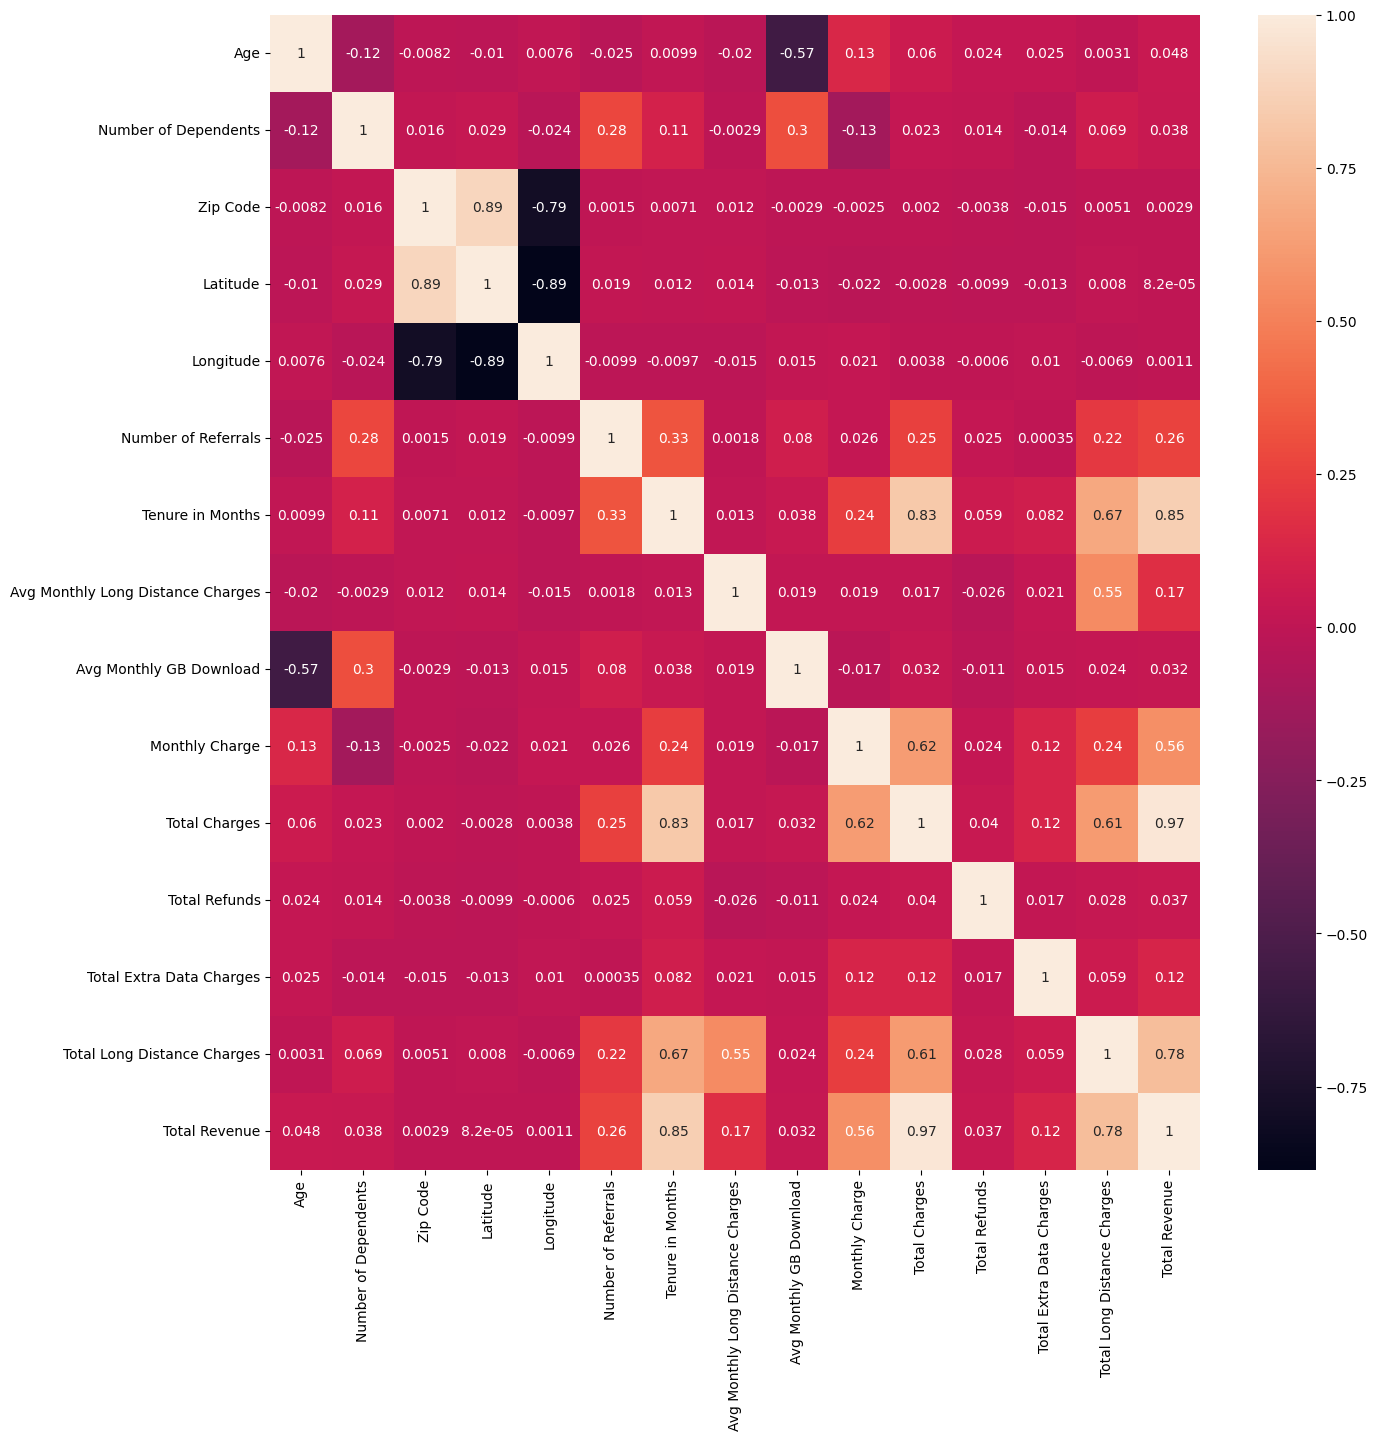

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame 'df' creation and correlation computation is assumed to be done before this step.

# Set the figure size using matplotlib
plt.figure(figsize=(15, 15))  # You can adjust the dimensions as needed

# Now plot the heatmap
sns.heatmap(df.corr(), annot=True)

# Display the plot
plt.show()

In [90]:
df.isna().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [93]:
# Handling null values for service-related features by filling them with "No Service" or equivalent
service_columns = [
    'Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup',
    'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
    'Streaming Music', 'Unlimited Data'
]

for col in service_columns:
    df[col].fillna('No Service', inplace=True)

# For 'Avg Monthly Long Distance Charges', let's assume customers with null values did not use the service
# and fill these with 0, indicating no charges.
df['Avg Monthly Long Distance Charges'].fillna(0, inplace=True)

# Now, let's recheck the null values to ensure they've been handled appropriately.
handled_nulls = df.isnull().sum()
handled_nulls


Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download              1526
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                  

In [102]:
# Fill null values in 'Churn Reason' with 'Not Specified'
df['Churn Reason'].fillna('Not Specified', inplace=True)

# Verify that the 'Churn Reason' column no longer has null values
churn_reason_nulls_after = df['Churn Reason'].isnull().sum()
churn_reason_nulls_after, df['Churn Reason'].unique()[:5]  # Display first 5 unique values as a sample


(0,
 array(['Not Specified', 'Competitor had better devices',
        'Product dissatisfaction', 'Network reliability',
        'Limited range of services'], dtype=object))

In [105]:
# Fill null values in 'Churn Reason' with 'Not Specified'
df['Churn Category'].fillna('Not Specified', inplace=True)

# Verify that the 'Churn Reason' column no longer has null values
churn_reason_nulls_after = df['Churn Category'].isnull().sum()
churn_reason_nulls_after, df['Churn Category'].unique()[:5]  # Display first 5 unique values as a sample

(0,
 array(['Not Specified', 'Competitor', 'Dissatisfaction', 'Other', 'Price'],
       dtype=object))

In [116]:
avg_monthly_gb_download_mode = df['Avg Monthly GB Download'].mode()[0]

# Fill null values in 'Avg Monthly GB Download' with the calculated mode
df['Avg Monthly GB Download'].fillna(avg_monthly_gb_download_mode, inplace=True)

In [117]:
df.isna().sum()

Customer ID                          0
Gender                               0
Age                                  0
Married                              0
Number of Dependents                 0
City                                 0
Zip Code                             0
Latitude                             0
Longitude                            0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data           

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

## EDA


In [119]:
import plotly.express as px

# Distribution of Age
fig_age = px.histogram(df, x='Age', title='Distribution of Age')
fig_age.show()

# Distribution of Monthly Charge
fig_monthly_charge = px.histogram(df, x='Monthly Charge', title='Distribution of Monthly Charge')
fig_monthly_charge.show()

# Churn by Gender
fig_gender_churn = px.histogram(df, x='Gender', color='Customer Status', barmode='group', title='Churn by Gender')
fig_gender_churn.show()

# Churn by Internet Service
fig_internet_service_churn = px.histogram(df, x='Internet Service', color='Customer Status', barmode='group', title='Churn by Internet Service')
fig_internet_service_churn.show()


In [122]:
churned_customers_with_reason = df[df['Churn Reason'] != 'Not Specified']

# Adjusting the visualization code to exclude the unsupported parameter
fig_churn_reasons_adjusted = px.histogram(churned_customers_with_reason, x='Churn Reason', color='Churn Reason',
                                          title='Distribution of Churn Reasons')
fig_churn_reasons_adjusted.update_layout(xaxis={'categoryorder':'total descending'}, showlegend=False)
fig_churn_reasons_adjusted.update_xaxes(tickangle=-45)
fig_churn_reasons_adjusted.show()


In [124]:
# Prepare the data for mapping: select latitude, longitude, and churn status
map_data = df[['Latitude', 'Longitude', 'Customer Status']]

# Plotly map visualization
fig_map = px.scatter_mapbox(map_data, lat='Latitude', lon='Longitude', color='Customer Status',
                            color_discrete_map={"Churned": "red", "Stayed": "green"},
                            title='Customer Churn by Geographic Location',
                            zoom=5, height=600)

fig_map.update_layout(mapbox_style="open-street-map")
fig_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_map.show()


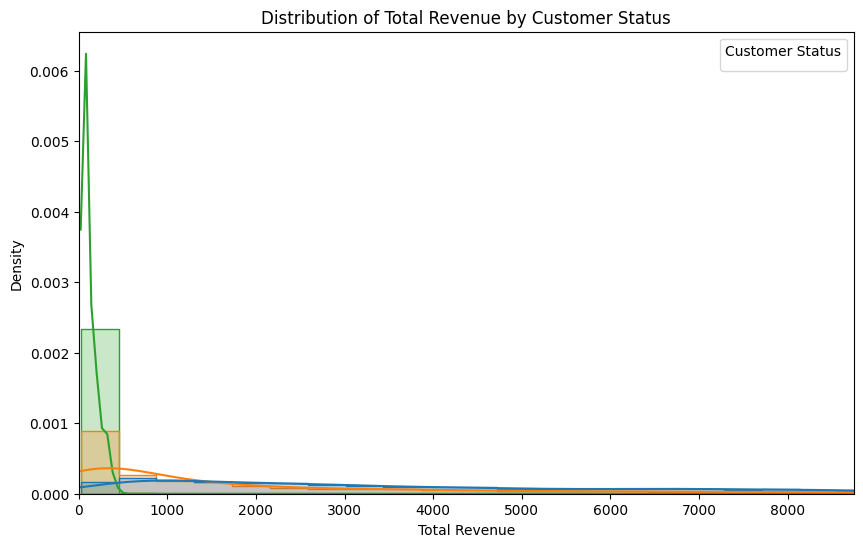

count    mean     std   min     25%     50%     75%      max
Customer Status                                                               
Churned         1869.00 1971.35 2438.44 21.61  175.85  893.55 2888.76 11195.44
Joined           454.00  119.56   89.47 21.36   56.97   91.09  166.24   456.10
Stayed          4720.00 3735.68 2852.94 73.65 1307.54 2960.11 5857.33 11979.34

In [126]:
# Summary statistics for total revenue by churn status
revenue_by_churn = df.groupby('Customer Status')['Total Revenue'].describe()

# Distribution plot for total revenue by churn status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total Revenue', hue='Customer Status', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribution of Total Revenue by Customer Status')
plt.xlabel('Total Revenue')
plt.ylabel('Density')
plt.legend(title='Customer Status')
plt.xlim(0, df['Total Revenue'].quantile(0.95))  # Limiting to 95th percentile for better visualization
plt.show()

revenue_by_churn


# Telecom -IBM Dataset

In [21]:
df = pd.read_csv('/content/IBM_telecom_churn.csv')

In [22]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [23]:
df.describe()

SeniorCitizen  tenure  MonthlyCharges
count        7043.00 7043.00         7043.00
mean            0.16   32.37           64.76
std             0.37   24.56           30.09
min             0.00    0.00           18.25
25%             0.00    9.00           35.50
50%             0.00   29.00           70.35
75%             0.00   55.00           89.85
max             1.00   72.00          118.75

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
df.corr()

SeniorCitizen  tenure  MonthlyCharges
SeniorCitizen            1.00    0.02            0.22
tenure                   0.02    1.00            0.25
MonthlyCharges           0.22    0.25            1.00

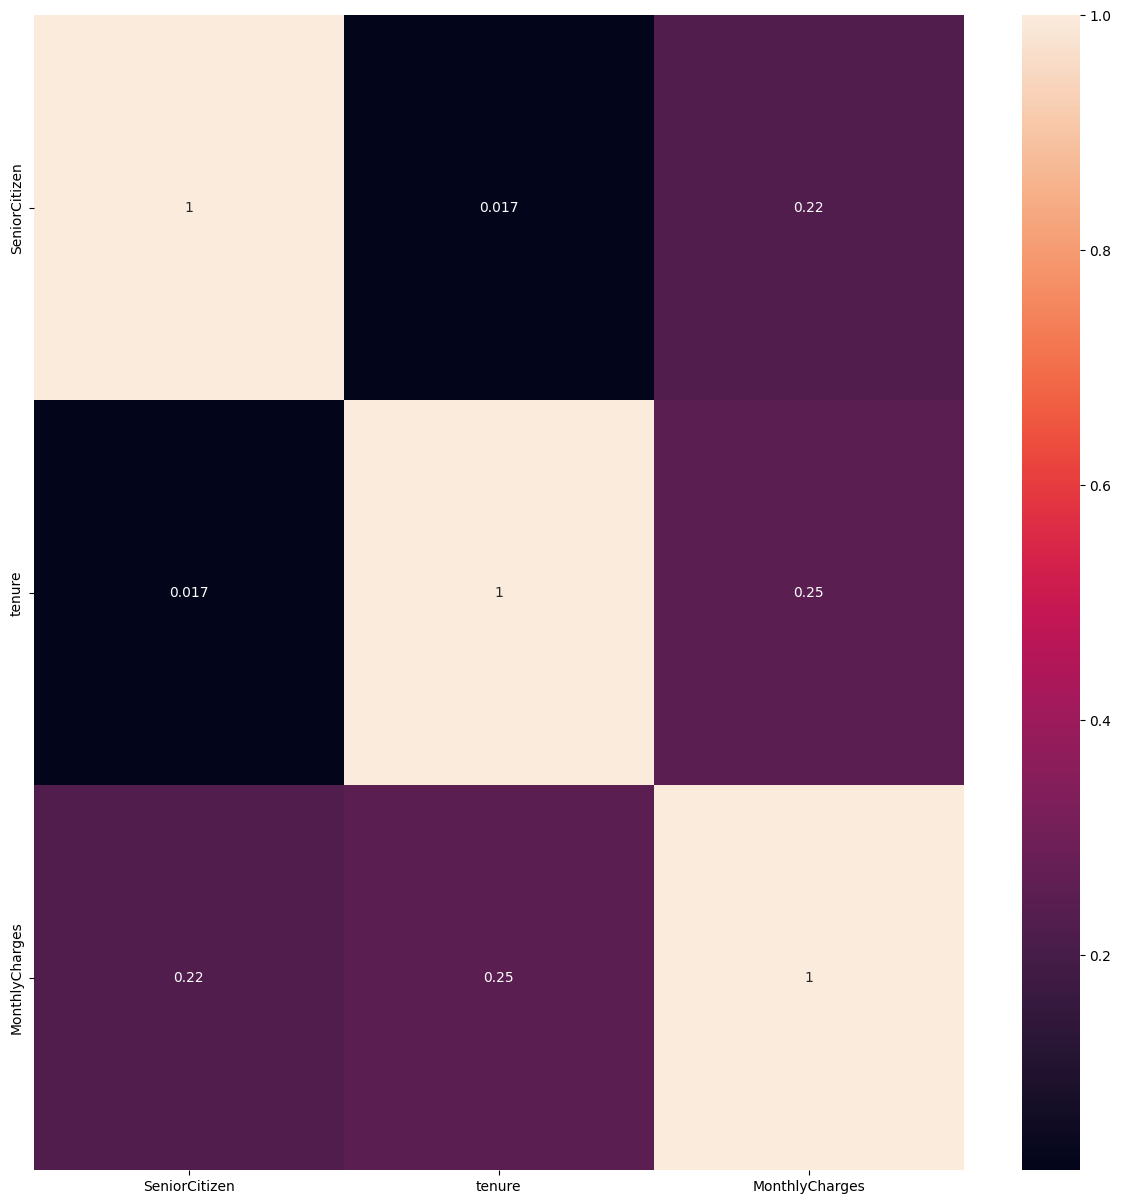

In [27]:
plt.figure(figsize=(15, 15))  # You can adjust the dimensions as needed

# Now plot the heatmap
sns.heatmap(df.corr(), annot=True)

# Display the plot
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Dropping the 'customerID' column
df = df.drop('customerID', axis=1)

# Encoding binary columns (Yes/No) directly
binary_columns = [col for col in df.columns if set(df[col].unique()) == {'Yes', 'No'}]
df[binary_columns] = df[binary_columns] == 'Yes'

# Encoding other categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Splitting the dataset into features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((5634, 6559), (1409, 6559), (5634,), (1409,))

In [246]:
from lazypredict.Supervised import LazyClassifier

# Initialize LazyClassifier to compare various models
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Display the performance of the models
models


  0%|          | 0/29 [00:15<?, ?it/s]


KeyboardInterrupt: 

In [248]:
import numpy as np
import pandas as pd
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestCentroid
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Assuming 'X' and 'y' are your features and labels
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "NearestCentroid": NearestCentroid(),
    "SVC": SVC(probability=True),  # 'probability=True' is needed for some metrics, adds overhead
    "BernoulliNB": BernoulliNB(),
    "AdaBoost": AdaBoostClassifier(),
    "LGBM": LGBMClassifier(),
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Prevents a warning
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} accuracy: {accuracy:.4f}")

    # Save each model
    os.makedirs('./telecom_IBM_models', exist_ok=True)
    model_path = os.path.join('./telecom_IBM_models', f'{name}.pkl')

    joblib.dump(clf, model_path)

# Displaying overall results
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
print(results_df)


NearestCentroid accuracy: 0.7339
SVC accuracy: 0.8027
BernoulliNB accuracy: 0.7857
AdaBoost accuracy: 0.8077
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
LGBM accuracy: 0.8006
XGB accuracy: 0.7871
                 Accuracy
NearestCentroid      0.73
SVC                  0.80
BernoulliNB          0.79
AdaBoost             0.81
LGBM                 0.80
XGB                  0.79


In [31]:
model = joblib.load('/content/telecom_IBM_models/AdaBoost.pkl')

In [32]:
import lime
import lime.lime_tabular
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined and preprocessed from your custom dataset

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a RandomForestClassifier model
# model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Initializing LIME Explainer
# Make sure feature_names is correctly defined. If X is a DataFrame, you can use X.columns.
# If X is a numpy array, you should manually define the feature names as a list.
feature_names = X.columns if hasattr(X, 'columns') else ['feature_' + str(i) for i in range(X.shape[1])]

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),  # Make sure training data is a numpy array
    feature_names=feature_names,
    class_names=np.unique(y),  # Assuming y contains the target class labels
    mode='classification'
)

# Explain a prediction for a specific instance
# Ensure idx points to a valid index in X_test
idx = 1  # Example index, adjust based on your dataset and indexing

# Check if X_test is a DataFrame and use .iloc[idx] to access the instance
# If it's a numpy array, access it with [idx]
instance = X_test.iloc[[idx]].values if hasattr(X_test, 'iloc') else X_test[idx]

# Ensure instance is formatted correctly for the model
# For pandas DataFrame, we used .values to get a numpy representation
# If it's a single instance, reshape might be necessary depending on the model input requirements
instance = instance.reshape(1, -1)

# It's crucial to pass a function that the explainer can use to make predictions
# This function should return probabilities
predict_fn = lambda x: model.predict_proba(x).astype(float)

# Generate explanation
explanation = explainer.explain_instance(instance[0], predict_fn, num_features=len(feature_names))


# Extracting the feature names and their weights
feature_importances = explanation.as_list()

# This will give you a list of tuples where the first element is the feature and
# the second element is the weight of that feature.
for feature, weight in feature_importances:
    print(f"Feature: {feature}, Weight: {weight}")


# Sorting features by their absolute importance
sorted_features = sorted(feature_importances, key=lambda x: abs(x[1]), reverse=True)

# Displaying sorted features
for feature, weight in sorted_features:
    print(f"Feature: {feature}, Weight: {weight}")


Streaming output truncated to the last 5000 lines.
Feature: TotalCharges_2659.45 <= 0.00, Weight: 0.0013136412986029314
Feature: TotalCharges_488.25 <= 0.00, Weight: 0.00131289290726228
Feature: TotalCharges_348.15 <= 0.00, Weight: 0.001311751648495945
Feature: TotalCharges_1380.1 <= 0.00, Weight: -0.0013104887592008617
Feature: TotalCharges_4577.9 <= 0.00, Weight: -0.001307927492392081
Feature: TotalCharges_7061.65 <= 0.00, Weight: 0.0013070443522030485
Feature: TotalCharges_2554 <= 0.00, Weight: 0.0013051919648968918
Feature: TotalCharges_804.85 <= 0.00, Weight: 0.0013051919648968918
Feature: TotalCharges_44.65 <= 0.00, Weight: 0.0013034843619833293
Feature: TotalCharges_4916.95 <= 0.00, Weight: 0.0013034843619833293
Feature: TotalCharges_3364.55 <= 0.00, Weight: -0.001302227371823255
Feature: TotalCharges_4492.9 <= 0.00, Weight: -0.001302227371823255
Feature: TotalCharges_8337.45 <= 0.00, Weight: -0.001302227371823255
Feature: TotalCharges_45.2 <= 0.00, Weight: 0.0012986992793722401

In [36]:
# Visualize the explanation (note: show_in_notebook might need adjustments for non-notebook environments)
explanation.show_in_notebook(show_table=True)

In [34]:
pip install dill


In [37]:
import dill

# Assuming `explainer` is your LIME explainer object
with open('lime_explainer_ibm.dill', 'wb') as f:
    dill.dump(explainer, f)


In [38]:
import dill

# Assuming `explanation` is your LIME explanation object
with open('lime_explanation_ibm.dill', 'wb') as f:
    dill.dump(explanation, f)


## ANN

In [168]:
import tensorflow as tf


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout, ReLU

model = Sequential()


In [182]:
df =pd.read_csv('/content/IBM_telecom_churn.csv')

In [183]:
null_per = (df.isnull().sum() / df.shape[0])* 100
null_per

customerID         0.00
gender             0.00
SeniorCitizen      0.00
Partner            0.00
Dependents         0.00
tenure             0.00
PhoneService       0.00
MultipleLines      0.00
InternetService    0.00
OnlineSecurity     0.00
OnlineBackup       0.00
DeviceProtection   0.00
TechSupport        0.00
StreamingTV        0.00
StreamingMovies    0.00
Contract           0.00
PaperlessBilling   0.00
PaymentMethod      0.00
MonthlyCharges     0.00
TotalCharges       0.00
Churn              0.00
dtype: float64

In [184]:
model.add(Dense( 20, activation = "ReLU"))
model.add(Dropout(0.4))

model.add(Dense(units = 10 , activation = "ReLU"))
model.add(Dropout(0.2))

model.add(Dense(units = 7 , activation = "ReLU"))
model.add(Dropout(0.1))

model.add(Dense(units = 4 , activation = "ReLU"))
model.add(Dropout(0.1))

model.add(Dense(1 , activation = "sigmoid"))

In [185]:
from tensorflow.keras.metrics import Precision,Recall,AUC,F1Score

model.compile(optimizer = "adam"  , loss = "binary_crossentropy" , metrics = ["accuracy",Precision(),Recall(),AUC(),F1Score()])

In [186]:
import tensorflow as tf
early = tf.keras.callbacks.EarlyStopping(
    monitor = "val_accuracy",
    min_delta = 0.0001,
    patience = 10,
    verbose = True,
    mode = "auto",
    restore_best_weights = True
)

In [187]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
X_train

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2142  4223-BKEOR  Female              0      No        Yes      21   
1623  6035-RIIOM  Female              0      No         No      54   
6074  3797-VTIDR    Male              0     Yes         No       1   
1362  2568-BRGYX    Male              0      No         No       4   
6754  2775-SEFEE    Male              0      No        Yes       0   
...          ...     ...            ...     ...        ...     ...   
3772  0684-AOSIH    Male              0     Yes         No       1   
5191  5982-PSMKW  Female              0     Yes        Yes      23   
5226  8044-BGWPI    Male              0     Yes        Yes      12   
5390  7450-NWRTR    Male              1      No         No      12   
860   4795-UXVCJ    Male              0      No         No      26   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
2142          Yes                No             DSL                  Yes   
1623          Yes               Yes     Fiber optic                   No   
6074           No  No phone service             DSL                   No   
1362          Yes                No     Fiber optic                   No   
6754          Yes               Yes             DSL                  Yes   
...           ...               ...             ...                  ...   
3772          Yes                No     Fiber optic                  Yes   
5191          Yes               Yes             DSL                  Yes   
5226          Yes                No              No  No internet service   
5390          Yes               Yes     Fiber optic                   No   
860           Yes                No              No  No internet service   

             OnlineBackup     DeviceProtection          TechSupport  \
2142                   No                  Yes                   No   
1623                  Yes                   No                   No   
6074                   No                   No                   No   
1362                   No                   No                   No   
6754                  Yes                   No                  Yes   
...                   ...                  ...                  ...   
3772                   No                   No                   No   
5191                  Yes                  Yes                  Yes   
5226  No internet service  No internet service  No internet service   
5390                   No                  Yes                   No   
860   No internet service  No internet service  No internet service   

              StreamingTV      StreamingMovies        Contract  \
2142                   No                  Yes        One year   
1623                  Yes                  Yes        Two year   
6074                   No                   No  Month-to-month   
1362                   No                   No  Month-to-month   
6754                   No                   No        Two year   
...                   ...                  ...             ...   
3772                  Yes                  Yes  Month-to-month   
5191                  Yes                  Yes        Two year   
5226  No internet service  No internet service  Month-to-month   
5390                  Yes                  Yes  Month-to-month   
860   No internet service  No internet service        One year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
2142               No               Mailed check           64.85       1336.8  
1623              Yes  Bank transfer (automatic)           97.20      5129.45  
6074              Yes           Electronic check           23.45        23.45  
1362              Yes           Electronic check           70.20       237.95  
6754              Yes  Bank transfer (automatic)           61.90               
...               ...                        ...             ...          ...  
3772              Yes           Electronic che

In [189]:
history = model.fit(X_train, y_train ,validation_split = 0.25 , batch_size = 32 ,epochs = 300 , callbacks = early)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [171]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.